In [4]:
import cv2
import imutils


In [5]:
from google.colab.patches import cv2_imshow

In [6]:
img = cv2.imread('object_center test.png')
RGB_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
blurred = cv2.GaussianBlur(gray, (5, 5), 0)
thresh = cv2.threshold(blurred, 60, 255, cv2.THRESH_BINARY)[1]

In [7]:
import numpy as np
# converting from BGR to HSV color space
hsv = cv2.cvtColor(img,cv2.COLOR_BGR2HSV)
 
# Range for lower red
lower_red = np.array([0,120,70])
upper_red = np.array([10,255,255])
mask1 = cv2.inRange(hsv, lower_red, upper_red)
 
# Range for upper range
lower_red = np.array([170,120,70])
upper_red = np.array([180,255,255])
mask2 = cv2.inRange(hsv,lower_red,upper_red)
 
# Generating the final mask to detect red color
mask1 = mask1+mask2

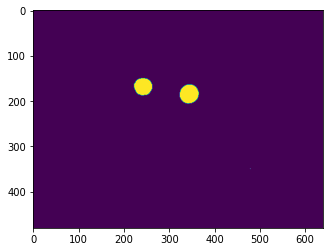

In [8]:
import matplotlib.pyplot as plt

plt.imshow(mask1)

In [9]:
cnts = cv2.findContours(mask1.copy(), cv2.RETR_EXTERNAL,
	cv2.CHAIN_APPROX_SIMPLE)

cnts = imutils.grab_contours(cnts)
A = cv2.moments(cnts[1])

A["m00"]

1328.5

In [10]:
import math
def dist_from_centre(x,y):
  X_centre = 320, 
  Y_centre = 240
  dist = math.sqrt(((x-X_centre)^2)+((y-Y_centre)^2))
  return dist

0 0
344 184
242 168


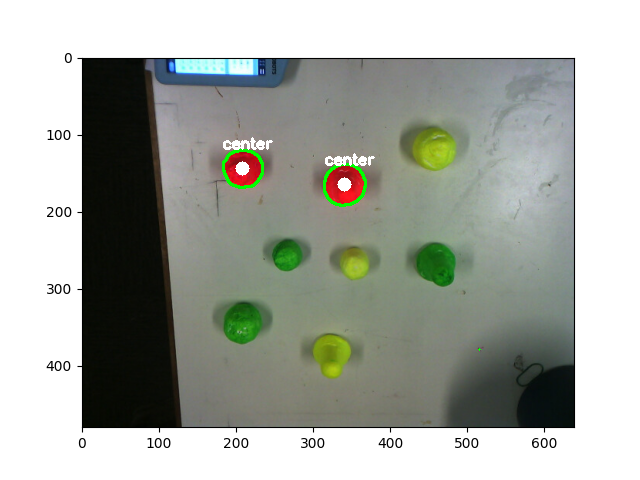

In [11]:
for c in cnts:
	# compute the center of the contour
	M = cv2.moments(c)
	cX = int(M["m10"] / (M["m00"]+0.001))
	cY = int(M["m01"] / (M["m00"]+0.001)) 
    
 
	# draw the contour and center of the shape on the image
	cv2.drawContours(img, [c], -1, (0, 255, 0), 2)
	cv2.circle(img, (cX, cY), 7, (255, 255, 255), -1)
	centre_img = cv2.putText(img, "center", (cX - 20, cY - 20),cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 2)
	# show the image
  #centre_lists = [] 
  #centre_lists.append[[cX,cY]]
	print(cX,cY)
 
 
	cv2.waitKey(0)
cv2_imshow(centre_img) 